# Importing D-Wave Libraries

In [271]:
# Import networkx for graph tools
import networkx as nx

# Import dwave_networkx for d-wave graph tools/functions
import dwave_networkx as dnx

# Import dwave.system packages for the QPU
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
# Import matplotlib.pyplot to draw graphs on screen
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt

import neal


%matplotlib inline

# Building our QUBO Problem, and qpu functions

In [256]:
def get_qubo(N,edges): # input a set of
    """Returns a dictionary representing a QUBO.
    Args:
        S(list of tuples): the coordinates of each node
    """
    
    Q = {}

    # Build QUBO 
    #Bonus for sites occupied to meet maximum condition
    
    for i in range(N):
        Q[(i,i)] = -1
 
    
    #Edge Constraints, # off diagonals
    for i in range(len(edges)):
        Q[(edges[i][0],edges[i][1])] = 3
    
    return Q

    
def run_on_qpu(Q, sampler):
    """Runs the QUBO problem Q on the sampler provided.
    Args:
        Q(dict): a representation of a QUBO
        sampler(dimod.Sampler): a sampler that uses the QPU
    """   
    numruns = 200

    sample_set = sampler.sample_qubo(Q, num_reads=numruns)
    
    return sample_set

# Building our problem graph

In [257]:
# Create empty graph
G = nx.Graph()

# Create Nodes
nodes = [(1.19, 4.25),
(2.71, 3.48),
(1.19, 3.51),
(2, 3.38),
(1.12, 2.86),
(1.70, 2.42),
(2.36, 2.54),
(1.52, 1.48),
(2.15, 1.54),
(2.14, 1.87),
(1.72, 0.86),
(2.29, 0.87)]


# Generate edges if they are close  within a distance of 1
edge_nodes =[] #nodes numbers for generating objective function inside Qubo function Q
edges = [] #coordinates for graph
for i in range(len(nodes)-1):
    for j in range(i+1,len(nodes)):
        xi = nodes[i][0]
        xj = nodes[j][0]
        yi = nodes[i][1]
        yj = nodes[j][1]
        dij = ((xi-xj)**2 +(yi-yj)**2)**(1/2)
        if dij <= 1:
            edge =(nodes[i],nodes[j])
            edge_indices = (i,j)
            edge_nodes.append(edge_indices)
            edges.append(edge)


G.add_edges_from(edges)


# Running problem on Dwave qpu

In [259]:
Q = get_qubo(len(nodes),edge_nodes)

#Set Sampler             
sampler = EmbeddingComposite(DWaveSampler(profile='CDL'))

sample_set = run_on_qpu(Q, sampler)
    
print(sample_set)    

    0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc. chain_.
0   1  0  0  1  1  0  0  0  0  1  1  0   -5.0      20     0.0
1   1  0  0  1  1  0  0  0  0  1  0  1   -5.0      25     0.0
2   1  1  0  0  1  0  0  0  0  1  1  0   -5.0      16     0.0
3   1  1  0  0  1  0  0  0  0  1  0  1   -5.0      28     0.0
4   1  1  0  0  1  0  1  0  0  0  1  0   -5.0       9     0.0
5   1  1  0  0  1  0  1  0  1  0  0  0   -5.0       7     0.0
6   1  1  0  0  1  0  1  1  0  0  0  0   -5.0      19     0.0
7   1  1  0  0  1  0  1  0  0  0  0  1   -5.0      11     0.0
8   1  0  0  1  0  0  0  0  0  1  1  0   -4.0       2     0.0
9   1  0  0  1  1  0  0  0  0  1  0  0   -4.0       1     0.0
10  1  0  0  0  1  0  0  0  0  1  1  0   -4.0       2     0.0
11  1  0  0  1  0  1  0  0  0  0  1  0   -4.0       3     0.0
12  0  0  0  1  1  0  0  0  0  1  1  0   -4.0       1     0.0
13  1  0  0  0  1  0  1  0  0  0  0  1   -4.0       1     0.0
14  1  0  0  0  1  0  1  1  0  0  0  0   -4.0       2     0.0
15  1  0

In [264]:
sample = list(sample_set.record[0][0])

print('Maximum independent set found is' ,sample)

Maximum independent set found is [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]


<Figure size 432x288 with 0 Axes>

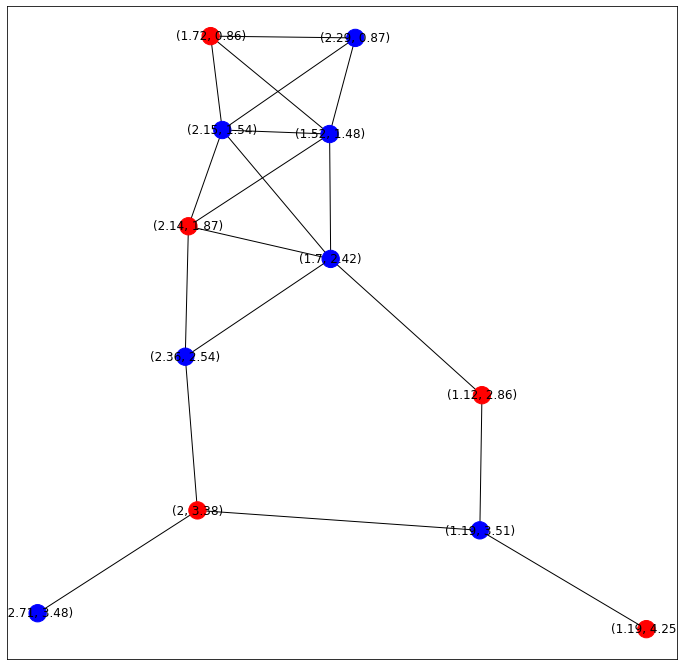

In [265]:
# Visualize the results
k = G.subgraph(sample)
sample_nodes = []
for i in range(len(sample)):
    if sample[i] == 1:
        sample_nodes.append(nodes[i])   
notsample = list(set(G.nodes()) - set(sample_nodes))
othersubgraph = G.subgraph(notsample)
pos = nx.spring_layout(G)
plt.figure()
color_map = []
for node in sample:
    if node ==1:
        color_map.append('red')
    else: 
        color_map.append('blue')
plt.figure(3,figsize=(12,12))         
# Save original problem graph
original_name = "antenna_plot_original.png"
nx.draw_networkx(G, pos=pos,node_color=color_map,with_labels=True)
#plt.savefig(original_name, bbox_inches='tight')
plt.show()

# Simulated Annealing

In [ ]:
Q = get_qubo(len(nodes),edge_nodes)

#Set Sampler             
sampler = EmbeddingComposite(DWaveSampler(profile='CDL'))

sample_set = run_on_qpu(Q, sampler)
    
print(sample_set)    

In [273]:

sampler = neal.SimulatedAnnealingSampler()
sample_set = run_on_qpu(Q, sampler)
    
print(sample_set)    

     0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc.
0    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
1    1  1  0  0  1  0  1  0  1  0  0  0   -5.0       1
2    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
3    1  1  0  0  1  0  1  1  0  0  0  0   -5.0       1
4    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
5    1  1  0  0  1  0  1  1  0  0  0  0   -5.0       1
6    1  1  0  0  1  0  1  0  1  0  0  0   -5.0       1
7    1  1  0  0  1  0  1  0  1  0  0  0   -5.0       1
8    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
9    1  1  0  0  1  0  0  0  0  1  1  0   -5.0       1
10   1  0  0  1  1  0  0  0  0  1  1  0   -5.0       1
11   1  1  0  0  1  0  1  1  0  0  0  0   -5.0       1
12   1  1  0  0  1  0  1  0  0  0  0  1   -5.0       1
13   1  1  0  0  1  0  0  0  0  1  1  0   -5.0       1
14   1  1  0  0  1  0  0  0  0  1  0  1   -5.0       1
15   1  1  0  0  1  0  1  1  0  0  0  0   -5.0       1
16   1  1  0  0  1  0  1  0  0  0  1  0   -5.0       1
17   1  1 

In [274]:
sample = list(sample_set.record[0][0])

print('Maximum independent set found is' ,sample)

Maximum independent set found is [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]


<Figure size 432x288 with 0 Axes>

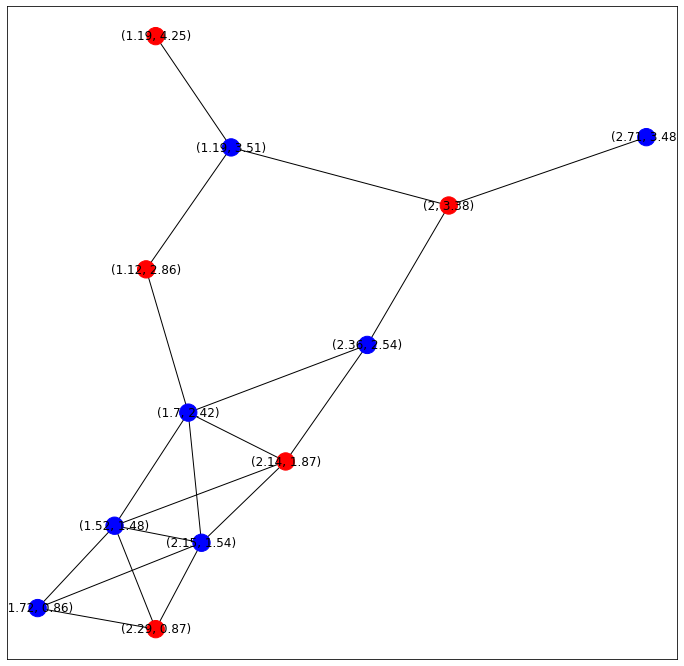

In [275]:
# Visualize the results
k = G.subgraph(sample)
sample_nodes = []
for i in range(len(sample)):
    if sample[i] == 1:
        sample_nodes.append(nodes[i])   
notsample = list(set(G.nodes()) - set(sample_nodes))
othersubgraph = G.subgraph(notsample)
pos = nx.spring_layout(G)
plt.figure()
color_map = []
for node in sample:
    if node ==1:
        color_map.append('red')
    else: 
        color_map.append('blue')
plt.figure(3,figsize=(12,12))         
# Save original problem graph
original_name = "antenna_plot_original.png"
nx.draw_networkx(G, pos=pos,node_color=color_map,with_labels=True)
#plt.savefig(original_name, bbox_inches='tight')
plt.show()

# To do
    - set to proper coordinates
    - draw circles
    - put in anneal schedule
    - benchmark run time
    - generate arbitrary larger graph
    - hybrid solver

In [ ]:
# Setting tuples as correct coordinates


pos={'0':(1,0),'1':(1,1),'2':(2,3),'3':(3,2),'4':(0.76,1.80),'5':(0,2)}    
nx.set_node_attributes(G, pos, 'coord')

In [ ]:
https://support.dwavesys.com/hc/en-us/community/posts/360050243474-anneal-schedule-details